#### Imports

In [1]:
# start w sqft, then add neighborhood
# add bed/br 

import pandas as pd
import regex as re
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%config InlineBackend.figure_formats = ['svg']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

#Saving models
import pickle



#### Read through Cleaned Dataset

In [3]:
# dataset is cleaned to have no negative prices
df = pd.read_csv("housing_price_dataset.csv")
df = df[df.Price > 0]
df

SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0            2126         4          1        Rural       1969  215355.283618
1            2459         3          2        Rural       1980  195014.221626
2            1860         2          1       Suburb       1970  306891.012076
3            2294         2          1        Urban       1996  206786.787153
4            2130         5          2       Suburb       2001  272436.239065
...           ...       ...        ...          ...        ...            ...
49995        1282         5          3        Rural       1975  100080.865895
49996        2854         2          2       Suburb       1988  374507.656727
49997        2979         5          3       Suburb       1962  384110.555590
49998        2596         5          2        Rural       1984  380512.685957
49999        1572         5          3        Rural       2011  221618.583218

[49978 rows x 6 columns]

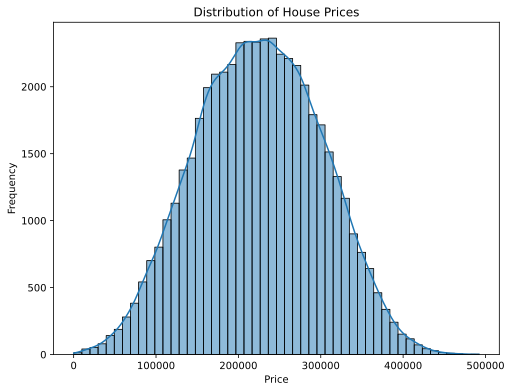

In [4]:
# Distribution of house prices
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### `MODEL 1:` Square Feet Model

Three housing price models will be provided based on three datasets containing a different combination of house traits. For example, Model 1 will be trained solely on the correlation between the house's square feet and the price. 

In [5]:
# Model 1 - Predicting house prices with square feet
X1 = df[['SquareFeet']]
y1 = df['Price']

# splitting data into training and testing
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [6]:
# Linear regression model
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

LinearRegression()

In [7]:
# Predictions on the test set
y1_predict = model1.predict(X1_test)
mse1 = mean_squared_error(y1_test, y1_predict)
r2_1 = r2_score(y1_test, y1_predict)

# Printing the results 
print(f"Model 1 - Mean Squared Error: {mse1}, R2 Score: {r2_1}")

Model 1 - Mean Squared Error: 2478542994.607646, R2 Score: 0.5720702456753711


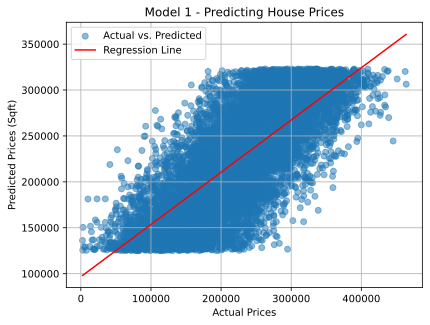

In [10]:
# Model 1 regression visualization
#plt.figure(figsize=(9, 6))
plt.scatter(y1_test, y1_predict, alpha=0.5, label='Actual vs. Predicted')
plt.title('Model 1 - Predicting House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (Sqft)')


reg_line1 = np.polyfit(y1_test, y1_predict, 1)
plt.plot(y1_test, np.polyval(reg_line1, y1_test), color='red', label='Regression Line')

plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Model 1 chart for detailed comparison
comparison_data_1 = pd.DataFrame({
    'SquareFeet': X1_test['SquareFeet'].values,
    'PredictedPrice': y1_predict,
    'ActualPrice': y1_test.values
})    

print(comparison_data_1.head())

   SquareFeet  PredictedPrice    ActualPrice
0        2768   300175.496629  339243.290088
1        2348   258579.169429  323235.930799
2        2872   310475.539555  248422.889866
3        1532   177763.448010  116974.660180
4        1077   132700.760210  169943.322343


For Model 1, we predict the house prices based on its size (square feet).

The Mean Squared Error (MSE) came out to be 2.478 x 10^9, which is the average squared difference between predicted vs actual house prices. A few samples of the difference between the expected and actual price of the houses can be seen in the input below. The R^2 score is 0.5721 which means 57.21% of the house price variability is explained by square footage alone. As we see from the red regression line on the visualization, it is a moderate fit.  


In [8]:
#Save Model 1 as a Pickle File
model1_pkl_file = "house_price_model1.pkl"

with open(model1_pkl_file, 'wb') as file: 
    pickle.dump(model1, file)

#### `MODEL 2:` Square Feet and Neighborhood

The second model is trained on freatures such as the house's square feet and type of neighborhood (rural, suburban, and urban) in correlation with its price.

In [12]:
# Model 2 - Predicting house price with square feet and neighborhood
X2 = df[['SquareFeet', 'Neighborhood']].copy()

# Processes the string Neighborhood values to integers
X2['Neighborhood'] = LabelEncoder().fit_transform(X2['Neighborhood'])
y2 = df['Price']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression()

In [13]:
# Making the predictions
y2_predict = model2.predict(X2_test)

mse2 = mean_squared_error(y2_test, y2_predict)
r2_2 = r2_score(y2_test, y2_predict)
print(f"Model 2 - Mean Squared Error: {mse2}, R2 Score: {r2_2}")

Model 2 - Mean Squared Error: 2477743191.6799335, R2 Score: 0.5722083346538995


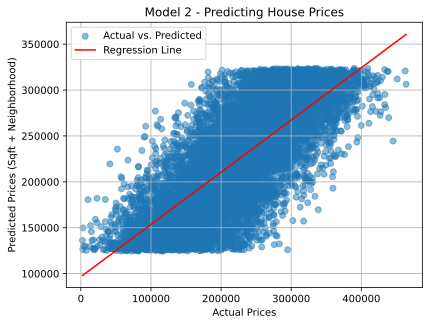

In [14]:
# Model 2 Visualization
plt.scatter(y2_test, y2_predict, alpha=0.5, label='Actual vs. Predicted')
plt.title('Model 2 - Predicting House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (Sqft + Neighborhood)')

# Regression line
reg_line = np.polyfit(y2_test, y2_predict, 1)
plt.plot(y2_test, np.polyval(reg_line, y2_test), color='red', label='Regression Line')

plt.legend()
plt.grid(True)
plt.show()


In [16]:
# Model 2 Chart we made for detailed comparison
comparison_data_2 = pd.DataFrame({
    'SquareFeet': X2_test['SquareFeet'].values,
    'Neighborhood': X2_test['Neighborhood'].values,
    'PredictedPrice': y2_predict,
    'ActualPrice': y2_test.values
})

print(comparison_data_2.head())

   SquareFeet  Neighborhood  PredictedPrice    ActualPrice
0        2768             0   299542.451368  339243.290088
1        2348             2   259207.480365  323235.930799
2        2872             2   311099.635384  248422.889866
3        1532             0   177140.345255  116974.660180
4        1077             2   133339.295196  169943.322343


For Model 2, we predict the housing price based on size (square feet) and neighborhood type (rural, suburban, and urban). 

The MSE of Model 2 is 2.477 × 10^9, and the R^2 value is 57.22%, compared to Model 1, whose MSE and R^2 values were 2.478 x 10^9 and 57.21% respectively. This is expected. As seen in the EDA notebook, the neighborhood type seemed to have very little correlation with housing prices. After dividing house prices by neighborhood type, it became obvious that the mean and median house prices for each type were almost identical. While training this second model based on neighborhood type improved the model's accuracy only very slightly, it proves our previous hypothesis that (in this dataset), neighborhood type had very little correlation with housing prices. 

Again, Model 2 is moderately accurate, but still has much room for improvement.

In [17]:
#Save Model 2 as a Pickle File
model2_pkl_file = "house_price_model2.pkl"

with open(model2_pkl_file, 'wb') as file: 
    pickle.dump(model2, file)

#### `MODEL 3:` Square Feet, Neighborhood, and Bedrooms

The third model is trained on freatures such as the house's square feet, type of neighborhood (rural, suburban, and urban), and the number of bedrooms in correlation with its price.

In [18]:
# Model 3 -  Predicting house price with square feet, neighborhood, and bedrooms
X3 = df[['SquareFeet', 'Neighborhood', 'Bedrooms']].copy()
X3['Neighborhood'] = LabelEncoder().fit_transform(X3['Neighborhood'])
y3 = df['Price']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

#Creating the linear regression model
model3 = LinearRegression()
model3.fit(X3_train, y3_train)


LinearRegression()

In [19]:
# Predictions for model 3
y3_predict = model3.predict(X3_test)

mse3 = mean_squared_error(y3_test, y3_predict)
r2_3 = r2_score(y3_test, y3_predict)
print(f"Model 3 - Mean Squared Error: {mse3}, R2 Score: {r2_3}")

Model 3 - Mean Squared Error: 2445657039.3954763, R2 Score: 0.5777481293212436


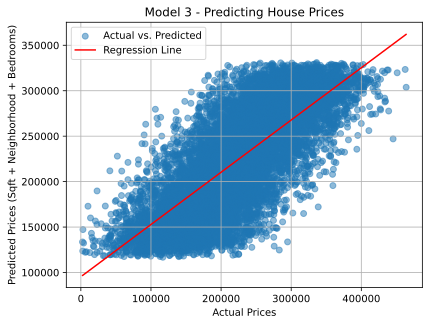

In [20]:
# Model 3 Visualization
#plt.figure(figsize=(9, 6))
plt.scatter(y3_test, y3_predict, alpha=0.5, label='Actual vs. Predicted')
plt.title('Model 3 - Predicting House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (Sqft + Neighborhood + Bedrooms)')

# Regression line
reg_line = np.polyfit(y3_test, y3_predict, 1)
plt.plot(y3_test, np.polyval(reg_line, y3_test), color='red', label='Regression Line')

plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Model 3 Chart we made for detailed comparison
comparison_data_3 = pd.DataFrame({
    'SquareFeet': X3_test['SquareFeet'].values,
    'Neighborhood': X3_test['Neighborhood'].values,
    'Bedrooms': X3_test['Bedrooms'].values,
    'PredictedPrice': y3_predict,
    'ActualPrice': y3_test.values  
})

print(comparison_data_3.head())

   SquareFeet  Neighborhood  Bedrooms  PredictedPrice    ActualPrice
0        2768             0         5   307204.458222  339243.290088
1        2348             2         5   266905.403254  323235.930799
2        2872             2         5   318814.587722  248422.889866
3        1532             0         2   169452.364078  116974.660180
4        1077             2         2   125686.092590  169943.322343


For Model 3, we predict the housing prices based on square feet, neighborhood type, and number of bedrooms. The MSE is 2.446 x 10^9 and the R^2 value is 57.77%, compared to 2.478 x 10^9 and 57.22% for Model 2, respectively. Although there is only a slight improvement to the accuracy of the model, this shows that the number of bathrooms has a much greater correlation to the pricing of the house than the type of neighborhood. It also shows that the most significant feature of the house that correlates to its price. 

Again, the accuracy of the model is moderate. However, with Model 3 around 57.8% of the variability in the data is accounted for by the model, and the average difference between predicted and actual prices is around $50,000 (49457.05). 

In [22]:
#Save Model 3 as a Pickle File
model3_pkl_file = "house_price_model3.pkl"

with open(model3_pkl_file, 'wb') as file: 
    pickle.dump(model3, file)

#### Final Model Visualization

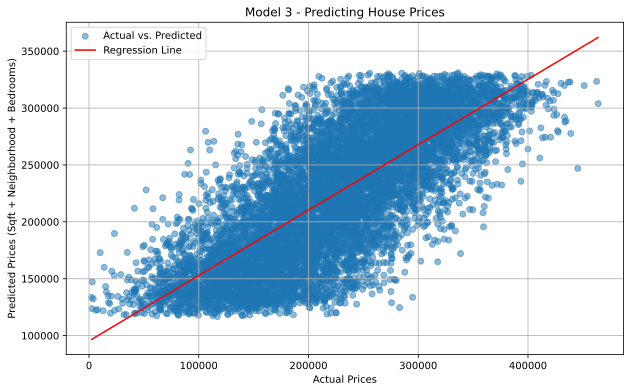

In [122]:
# Model 3 Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y3_test, y3_predict, alpha=0.5, label='Actual vs. Predicted')
plt.title('Model 3 - Predicting House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (Sqft + Neighborhood + Bedrooms)')

# Regression line
reg_line = np.polyfit(y3_test, y3_predict, 1)
plt.plot(y3_test, np.polyval(reg_line, y3_test), color='red', label='Regression Line')

plt.legend()
plt.grid(True)
plt.show()